<a href="https://colab.research.google.com/github/mayu99/Deep-Learning/blob/main/Simple_Neural_Network_Implementation_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


In [3]:
X,Y = load_coffee_data()

The semicolon at the end of the line X,Y = load_coffee_data(); serves as a statement terminator in Python. It indicates that the statement is complete and ready to be executed by the interpreter. Without the semicolon, the interpreter would attempt to combine the statement with the next line, which could lead to syntax errors or unexpected behavior.

In this specific case, the semicolon separates the function call load_coffee_data() from any potential statements that follow it. By explicitly terminating the statement, the programmer ensures that the function call is executed independently and its results are stored in the variables X and Y.

The semicolon plays a crucial role in Python syntax, helping to organize and structure code effectively. It ensures that statements are properly separated and interpreted correctly, preventing errors and promoting clear code readability.

In [4]:
print(X.shape, Y.shape)

(200, 2) (200, 1)


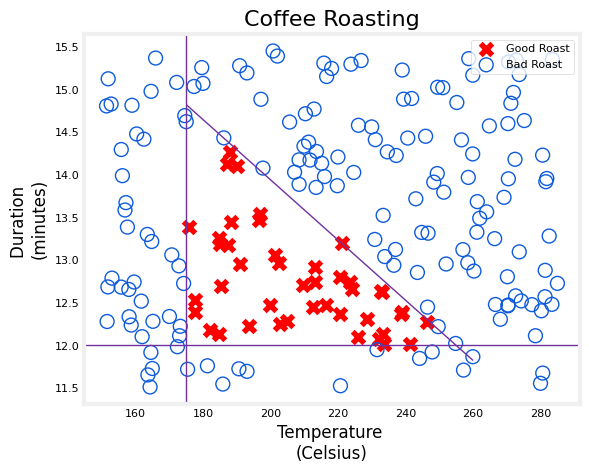

In [5]:
plt_roast(X,Y)

In [11]:
print("Pre-normalization")
print("Temperature max:- ", np.round(np.max(X[:,0]),2))
print("Temperature min:- ", np.round(np.min(X[:,0]),2))
print("Duration max:- ", np.round(np.max(X[:,1]),2))
print("Duration min:- ", np.round(np.min(X[:,1]),2))

Pre-normalization
Temperature max:-  284.99
Temperature min:-  151.32
Duration max:-  15.45
Duration min:-  11.51


The numbers 0 and 1 in the np.max index refer to the dimensions of the data array X. In this case, X is a two-dimensional array with two columns, representing the two features: temperature and duration.

The np.max function takes an array as input and returns the maximum value along a specified axis. The axis is specified by the axis keyword argument. By default, axis is set to None, which means that np.max will return the maximum value across the entire array, regardless of its dimensions.

In [16]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X)

In the context of the tf.keras.layers.Normalization layer, the axis=-1 argument specifies that the normalization should be applied to the last axis of the input data. This means that the normalization will be applied to each feature individually, rather than across all features together.

This line of code calls the adapt() method on the normalization layer. This method learns the mean and variance of the input data and stores them internally. This information will be used later when the normalization layer is applied to normalize the data.

This line of code applies the normalization layer to the input data X. The output of the normalization layer is stored in the variable Xn.

In [18]:
print("Post-normalization")
print("Temperature max:- ", np.round(np.max(Xn[:,0]),2))
print("Temperature min:- ", np.round(np.min(Xn[:,0]),2))
print("Duration max:- ", np.round(np.max(Xn[:,1]),2))
print("Duration min:- ", np.round(np.min(Xn[:,1]),2))

Post-normalization
Temperature max:-  1.66
Temperature min:-  -1.69
Duration max:-  1.79
Duration min:-  -1.7


In [19]:
Xt = np.tile(Xn,(1000,1))
Yt = np.tile(Y, (1000,1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


This line of code creates a new array Xt by replicating the array Xn 1000 times along the first axis. The np.tile() function takes two arguments: the array to be replicated and the number of times to replicate it along each axis. In this case, the first argument is Xn and the second argument is (1000,1). The (1000,1) tuple specifies that Xn should be replicated 1000 times along the first axis (the rows) and 1 time along the second axis (the columns).

In [30]:
 # Tensorflow model

tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation = "sigmoid", name = "Layer1"),
        Dense(1, activation = "sigmoid", name = "Layer2")
    ]
)

This line sets the random seed for TensorFlow's random number generator. This ensures that the model's weights are initialized with the same values every time it is trained, which leads to consistent results.

This code defines a sequential model using the tf.keras.models.Sequential class. Sequential models are a simple and efficient way to define models with a linear stack of layers.

tf.keras.Input(shape=(2,)): This line defines the input layer of the model. The shape=(2,) argument specifies that the input layer has two dimensions, meaning it can accept two-dimensional data with two features.

Dense(3, activation='sigmoid', name='layer1'): This line defines the first hidden layer of the model. The Dense() layer creates a fully connected layer with 3 units, meaning it has 3 output neurons. The activation='sigmoid' argument specifies that the sigmoid activation function is applied to the output of the layer. The name='layer1' argument assigns the name layer1 to the layer, which can be useful for identifying and accessing the layer later in the code.

Dense(1, activation='sigmoid', name='layer2'): This line defines the output layer of the model. Similar to the first hidden layer, it has a single unit and uses the sigmoid activation function. The name='layer2' argument assigns the name layer2 to the layer.

The overall model structure is a feedforward neural network with two hidden layers, each with 3 units, and an output layer with a single unit. The sigmoid activation function is used in all layers, which ensures that the output values are between 0 and 1.

The tf.keras.Input(shape=(2,)) line specifies the expected shape of the input data to the Keras model. This information is crucial for TensorFlow to properly initialize and manage the weights and bias parameters of the model's layers.

When you define a layer in a Keras model, it needs to know the shape of the input data it will receive. This is especially important for layers like Dense (fully connected) layers, which connect every input neuron to every output neuron. The number of weights and biases required for these connections depends on the size of the input and output layers.

By providing the input shape using tf.keras.Input(shape=(2,)), you inform TensorFlow about the dimensions of the incoming data. This allows TensorFlow to allocate the appropriate amount of memory for the weights and biases of each layer, ensuring that the model can handle the input data correctly.

This statement means that it is not always necessary to explicitly specify the input shape of a Keras model using tf.keras.Input(shape=(2,)). Instead, TensorFlow can automatically infer the input shape from the data provided during the model training process. This is typically done when calling the model.fit() method, which requires input data and target labels.

When using this approach, TensorFlow will analyze the shape of the input data and automatically initialize the weights and bias parameters of the model accordingly. This can be useful when you are working with data that has a dynamic or unknown shape, or when you want to explore different model architectures without having to manually specify the input shape each time.

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Dense)              (None, 3)                 9         
                                                                 
 Layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In the provided output, the model summary indicates the following details:

Model Name: "sequential" - This refers to the model type, which in this case is a sequential model, a simple type of model where layers are stacked linearly.

Layer Name: "layer1" - This is the name assigned to the first hidden layer of the model.

Layer Type: "Dense" - This indicates that the layer is a fully connected layer, also known as a dense layer, where each neuron in the layer is connected to every neuron in the previous layer.

Output Shape: "(None, 3)" - This represents the shape of the output produced by the layer. "(None, 3)" means that the first dimension is variable and can have any length, and the second dimension has a fixed size of 3.

Param #: "9" - This indicates the total number of trainable parameters in the layer, which in this case is 9. Trainable parameters are the weights and biases that are adjusted during the model training process.

Similar information is provided for the second hidden layer, "layer2", which has a single neuron in the output layer.

Total params: "13" - This represents the total number of trainable parameters in the entire model, which is the sum of the parameters in all layers.

Trainable params: "13" - This indicates that all parameters in the model are trainable. Non-trainable parameters are typically fixed values that are not adjusted during training.

Non-trainable params: "0" - This confirms that there are no non-trainable parameters in the model.

Overall, the model summary provides a clear and concise summary of the model's architecture and the number of trainable parameters, which is useful for understanding the complexity of the model and its resource requirements.



In [32]:
L1_param = 2*3+3
L2_param = 3*1+1
print("L1_param = ", L1_param, "\nL2_param = ", L2_param)
print("Total param = ",L1_param + L2_param)


L1_param =  9 
L2_param =  4
Total param =  13


In [44]:
W1, b1 = model.get_layer("Layer1").get_weights()
W2, b2 = model.get_layer("Layer2").get_weights()
print("W1{}:\n{} \nb1:{}".format(W1.shape, W1, b1))
print("\nW2{}: \n{} \nb2: {}".format(W2.shape, W2, b2))

W1(2, 3):
[[-0.43 -0.81 -0.34]
 [-0.42 -0.04  0.43]] 
b1:[0. 0. 0.]

W2(3, 1): 
[[0.19]
 [0.19]
 [0.38]] 
b2: [0.]


These lines retrieve the weights and biases for each layer of the model. The model.get_layer() method returns the specified layer object, and the get_weights() method returns a list containing the layer's weights and biases. The weights and biases are stored in separate variables for each layer.

The weights and biases for the layers in the neural network are initialized using a technique called Xavier initialization. This method aims to ensure that the initial values of the weights and biases are not too large or too small, which can help prevent the model from getting stuck in local minima or exploding during training.

The specific formula for Xavier initialization depends on whether the weights connect layers with the same or different numbers of neurons. For layers with the same number of neurons, the formula is:

W = np.random.randn(N, N) / np.sqrt(N)
where:

W is the weight matrix
N is the number of neurons in each layer
np.random.randn() generates a random matrix from a standard normal distribution
For layers with different numbers of neurons, the formula is:

W = np.random.randn(N_in, N_out) / np.sqrt((N_in + N_out) / 2)
where:

W is the weight matrix
N_in is the number of neurons in the input layer
N_out is the number of neurons in the output layer
np.random.randn() generates a random matrix from a standard normal distribution
The biases are initialized using a zero vector, meaning they are all set to 0.

Once the weights and biases are initialized, they are updated during training using a process called backpropagation. Backpropagation is an algorithm that calculates the gradients of the loss function with respect to the weights and biases. These gradients are then used to update the weights and biases in a way that reduces the loss function.

In [46]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
)

model.fit(
    Xt,Yt,
    epochs= 10,
)

Epoch 1/10
6250/6250 [==============================] - 14s 2ms/step - loss: 0.2623
Epoch 2/10
6250/6250 [==============================] - 13s 2ms/step - loss: 0.1180
Epoch 3/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.1104
Epoch 4/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.0658
Epoch 5/10
6250/6250 [==============================] - 13s 2ms/step - loss: 0.0163
Epoch 6/10
6250/6250 [==============================] - 13s 2ms/step - loss: 0.0105
Epoch 7/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.0074
Epoch 8/10
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0052
Epoch 9/10
6250/6250 [==============================] - 13s 2ms/step - loss: 0.0038
Epoch 10/10
6250/6250 [==============================] - 13s 2ms/step - loss: 0.0028


In the provided code, the weights and biases are initialized during the model initialization process, specifically when the model.compile() method is called. The model.compile() method not only sets up the training configuration but also initializes the weights and biases of the model's layers.

The initialization of weights and biases occurs after the model has been defined, including the layer structure, activation functions, and any other configuration settings. Once the model is ready for training, the model.compile() method initializes the weights and biases using Xavier initialization.

Here's a breakdown of the initialization process:

Model Definition: The model is defined using the tf.keras.models.Sequential() class, specifying the layer types, activation functions, and input shape.

Model Configuration: The model's optimizer, loss function, and metrics are specified using the model.compile() method.

Weight Initialization: During the model.compile() call, Xavier initialization is applied to the weights and biases of all layers in the model.

Model Training: Once the model is initialized, it can be trained using the model.fit() method, which updates the weights and biases based on the training data and the specified optimizer.

Therefore, the weight and bias initialization occurs during the model compilation phase, which prepares the model for training and sets the initial parameter values for the neural network.

In [47]:
# Updated weights

W1, b1 = model.get_layer("Layer1").get_weights()
W2, b2 = model.get_layer("Layer2").get_weights()

The weights and biases are updated after fitting because the model adjusts its parameters to minimize the loss function. The loss function measures the discrepancy between the model's predictions and the true labels for the training data. By updating the weights and biases, the model can improve its predictions and reduce the overall loss.

The process of updating the weights and biases is called backpropagation. Backpropagation works by calculating the gradients of the loss function with respect to the weights and biases. These gradients indicate how much each parameter contributes to the overall error. The model then updates the weights and biases in a direction that reduces the gradients, which means it moves in the direction that minimizes the loss.

Updating the weights and biases is an iterative process that continues throughout the training phase. As the model processes more training data, it continuously refines its parameters to better represent the underlying patterns in the data. This process of iterative parameter optimization is what allows the model to learn and improve its predictive performance.

In summary, the weights and biases are updated after fitting because the model is actively learning from the training data. By adjusting its parameters, the model strives to minimize the loss function and make more accurate predictions.

In [50]:
print("W1: \n{} \nb1:{}".format(W1,b1))
print("\nW2: \n{} \nb2:{}".format(W2,b2))

W1: 
[[ -0.05  15.12 -10.44]
 [ -9.12  12.52  -0.24]] 
b1:[-11.46   1.93 -11.34]

W2: 
[[-41.59]
 [-37.71]
 [-44.91]] 
b2:[23.82]



The output b1(3,): [0. 0. 0.] indicates that the biases for the first layer of the neural network are all initialized to 0. This is because the biases are initialized using a zero vector, meaning they are all set to 0.

The first layer of the neural network has 3 units, so the biases are a vector of length 3. The output b1(3,): [0. 0. 0.] indicates that the values of all 3 biases are 0.

This initialization strategy ensures that the model starts off with a neutral state, which can help prevent it from getting stuck in local minima or exploding during training.

**Why 3, and why not 1,3 because it has  row and 3 column ?**

In the context of neural networks, biases are typically represented as vectors, not matrices. The length of the bias vector corresponds to the number of neurons in the layer. Since the first layer in this case has 3 neurons, the bias vector is of length 3.

The notation b1(3,): [0. 0. 0.] is a shorthand way of representing the bias vector for the first layer. The b1 part indicates that the bias vector is for layer 1, and the (3,): part indicates that the vector has a length of 3. The actual values of the biases, [0. 0. 0.], are enclosed in square brackets.

In general, the shape of a bias vector is (number of neurons in the layer, 1). This is because biases are typically added to each neuron individually, not across multiple neurons. Therefore, the bias vector has a single column, with each element corresponding to the bias for a single neuron.

In this specific case, since the first layer has 3 neurons, the bias vector has a shape of (3, 1). However, for simplicity, the output only displays the values of the biases, not their shape. Therefore, the output is b1(3,): [0. 0. 0.], which indicates that the bias vector for the first layer is of length 3 and all elements are initialized to 0.

In [51]:
# Loading saved weights

W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])

model.get_layer("Layer1").set_weights([W1,b1])
model.get_layer("Layer2").set_weights([W2,b2])

loading saved weights is a valuable practice for preserving the results of successful training runs and ensuring consistent model performance across different environments and TensorFlow versions.

In [53]:
# Prediction

X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example

X_testn = norm_l(X_test)
Prediction = model.predict(X_testn)
print("Prediction: \n", Prediction)

1/1 [==============================] - 0s 59ms/step
Prediction: 
 [[9.63e-01]
 [3.03e-08]]


In [58]:
yhat = np.zeros_like(Prediction)
for i in range(len(Prediction)):
  if Prediction[i] >= 0.5:
    yhat[i] = 1
  else:
    yhat[i] = 0

print(f"Decision: \n{yhat}")

Decision: 
[[1.]
 [0.]]



The statement yhat = np.zeros_like(predictions) creates an array yhat filled with zeros, with the same shape and data type as the predictions array. This is commonly used in machine learning to initialize an array of predictions or targets.

In [59]:
yhat = (Prediction >= 0.5).astype(float)
print(f"Decision: \n{yhat}")

Decision: 
[[1.]
 [0.]]


The expression (predictions >= 0.5) applies a binary threshold to the predictions array. This means that for each element in the predictions array, if the value is greater than or equal to 0.5, it is set to 1; otherwise, it is set to 0.